# 4章

In [1]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

# for graphical enhancement
from mizani.labels import label_date, label_dollar, label_percent, label_comma
from mizani.palettes import brewer_pal
from pysocviz.properties import dcolors

p9options.figure_size = (6.4, 4.8)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

In [2]:
# to handle with categorical variables with na
from pysocviz.utils import redefine_cat_with_na

# In most cases, you may not import them.
# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex

# dataset packages
from pysocviz.loader import load_dataset
from gapminder import gapminder
import plotnine.data as p9data

gss_sm = load_dataset('gss_sm')
midwest = p9data.midwest
titanic = load_dataset('titanic')
oecd_sum = load_dataset('oecd_sum')

## 図 4.1

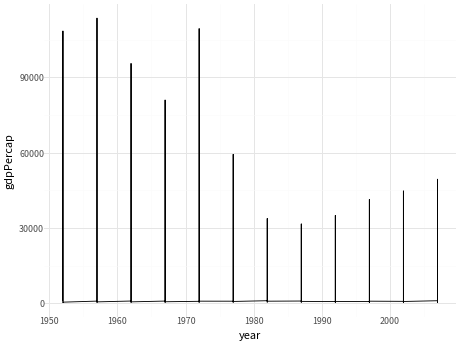

In [3]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line()

## 図 4.2

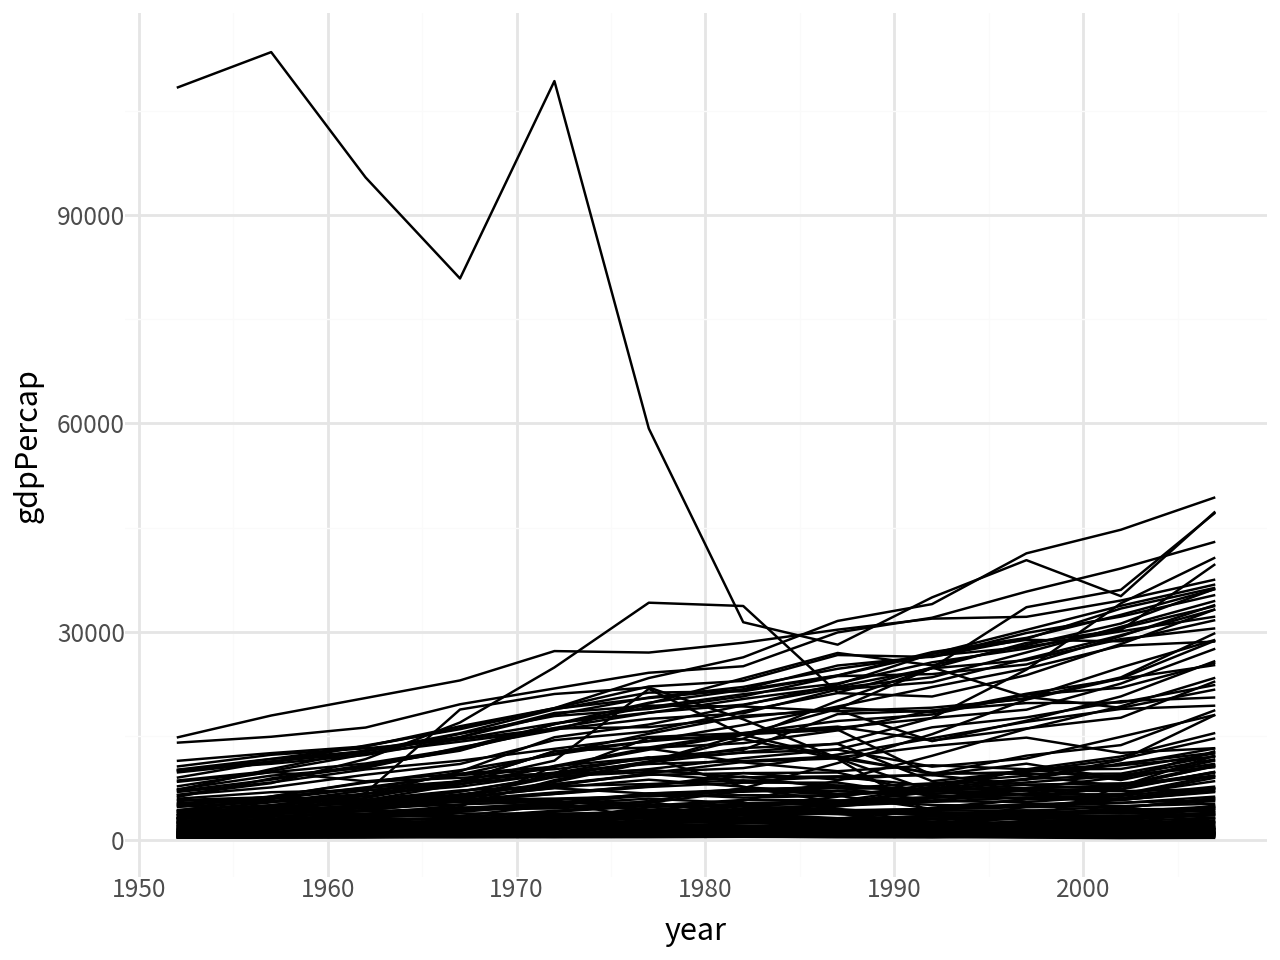

In [4]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(aes(group='country'))

## 図 4.3

注: **Plotnine** は現時点 (v0.8) ではアスペクト比がファセット単位ではなくプロット全体を基準に決定されます. ファセットごとのアスペクトで固定したい場合は, テーマ関数の `aspect_ratio` themeable を使用する必要があります (これは `coord_fixed(ratio=)` とは異なります).

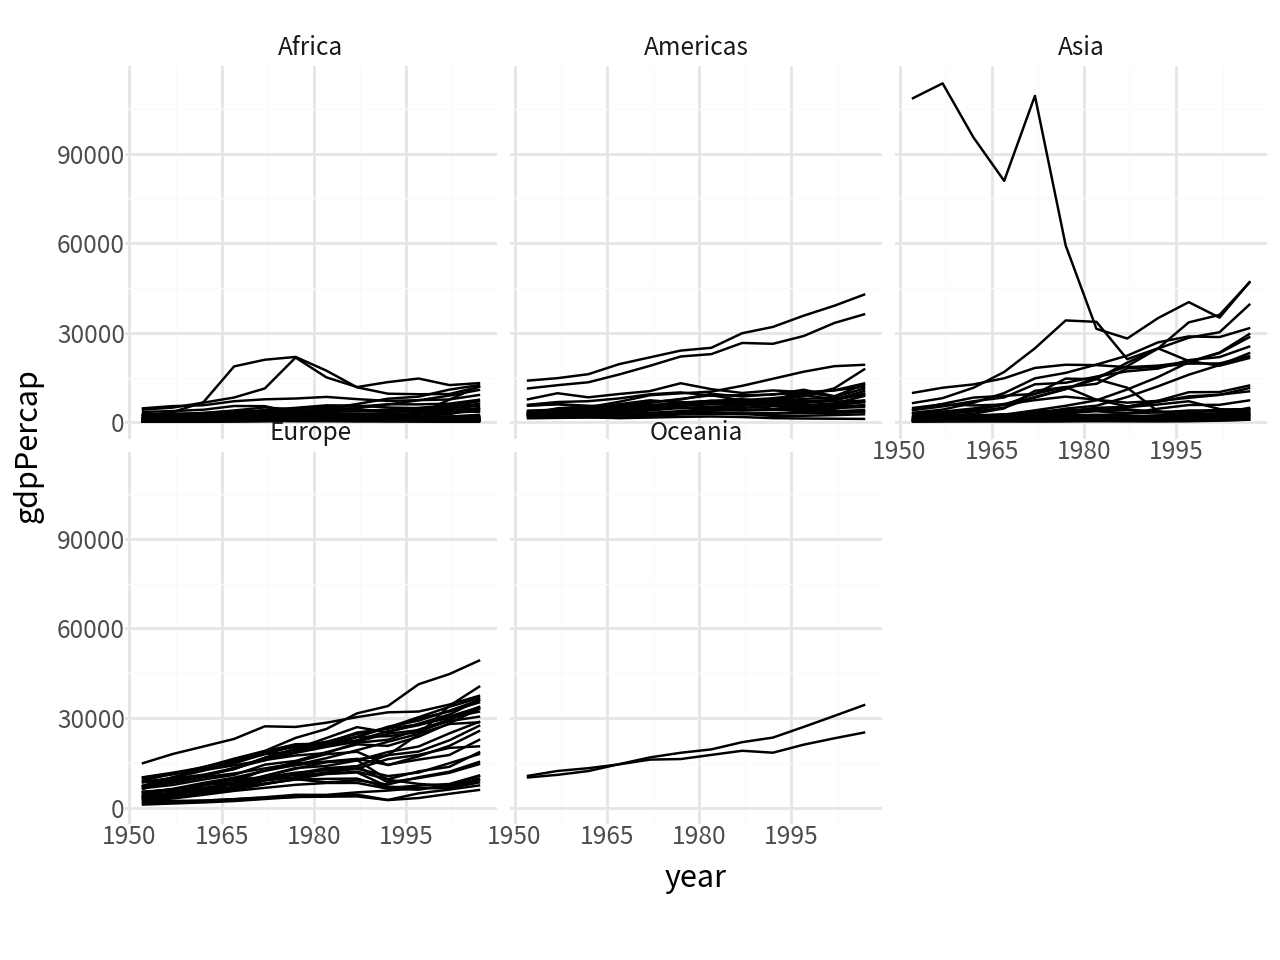

In [5]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(aes(group='country')
) + facet_wrap('continent') + scale_x_continuous(
  breaks=lambda x: np.ceil(np.linspace(x[0], x[1], 5))
) + theme(aspect_ratio=1.0)

## 図 4.4

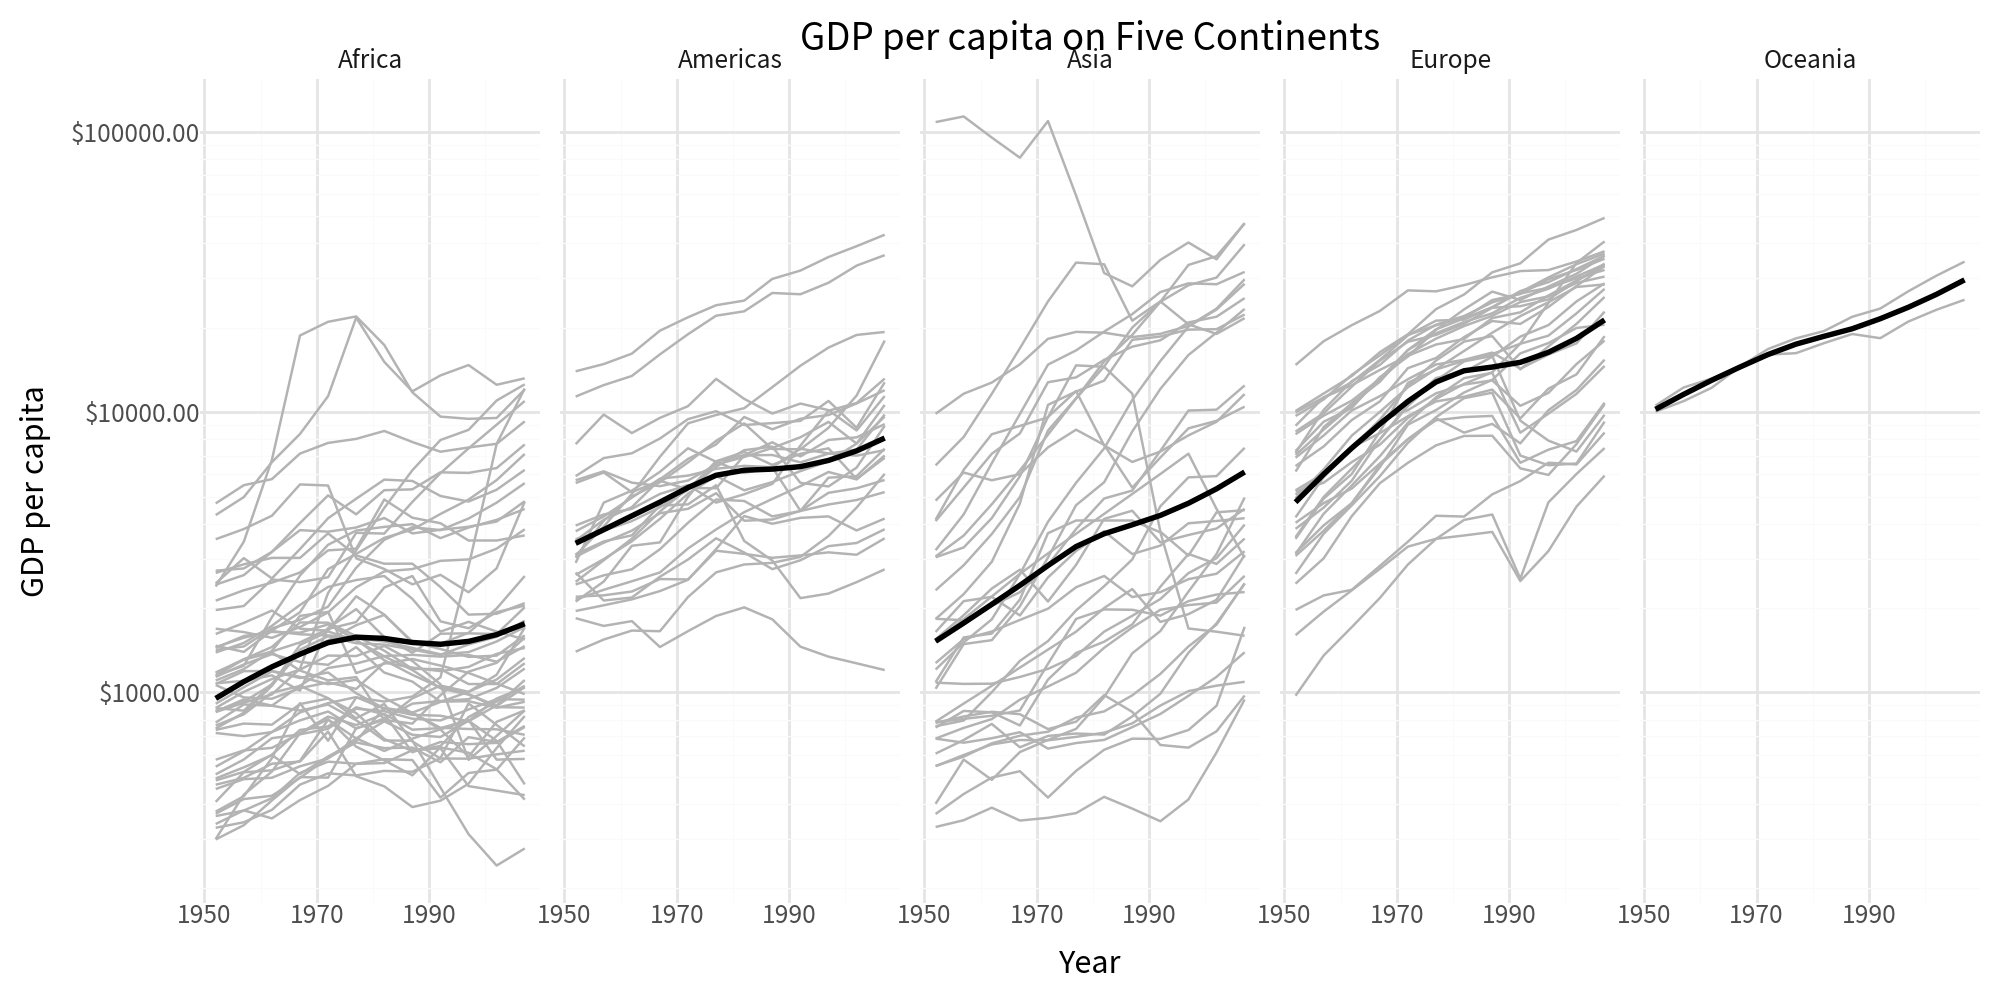

In [6]:
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(
  aes(group='country'),
  color=dcolors.get('gray70')
) + geom_smooth(
  size=1.1, method='loess', se=False
) + scale_y_log10(
  labels=label_dollar()
) + facet_wrap(
  'continent', ncol=5
) + labs(
  x="Year",
  y="GDP per capita",
  title="GDP per capita on Five Continents"
) + scale_x_continuous(
  breaks=lambda x: np.ceil(np.linspace(x[0], x[1], 4))
) + theme(figure_size=(10, 5))

## 図 4.5

注: `facet_grid()` に formula を書く代わりに, `facet_grid(['sex', 'race'])` のようにリストで書くこともできます. 一辺のみの formula (例: `~ sex`) は `['.', 'sex']` に書き換えられます. 複数の項でも可能です (例: `~ sex + race` は `['.', ['sex', 'race']]` と同じです).

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 18 rows containing missing values.


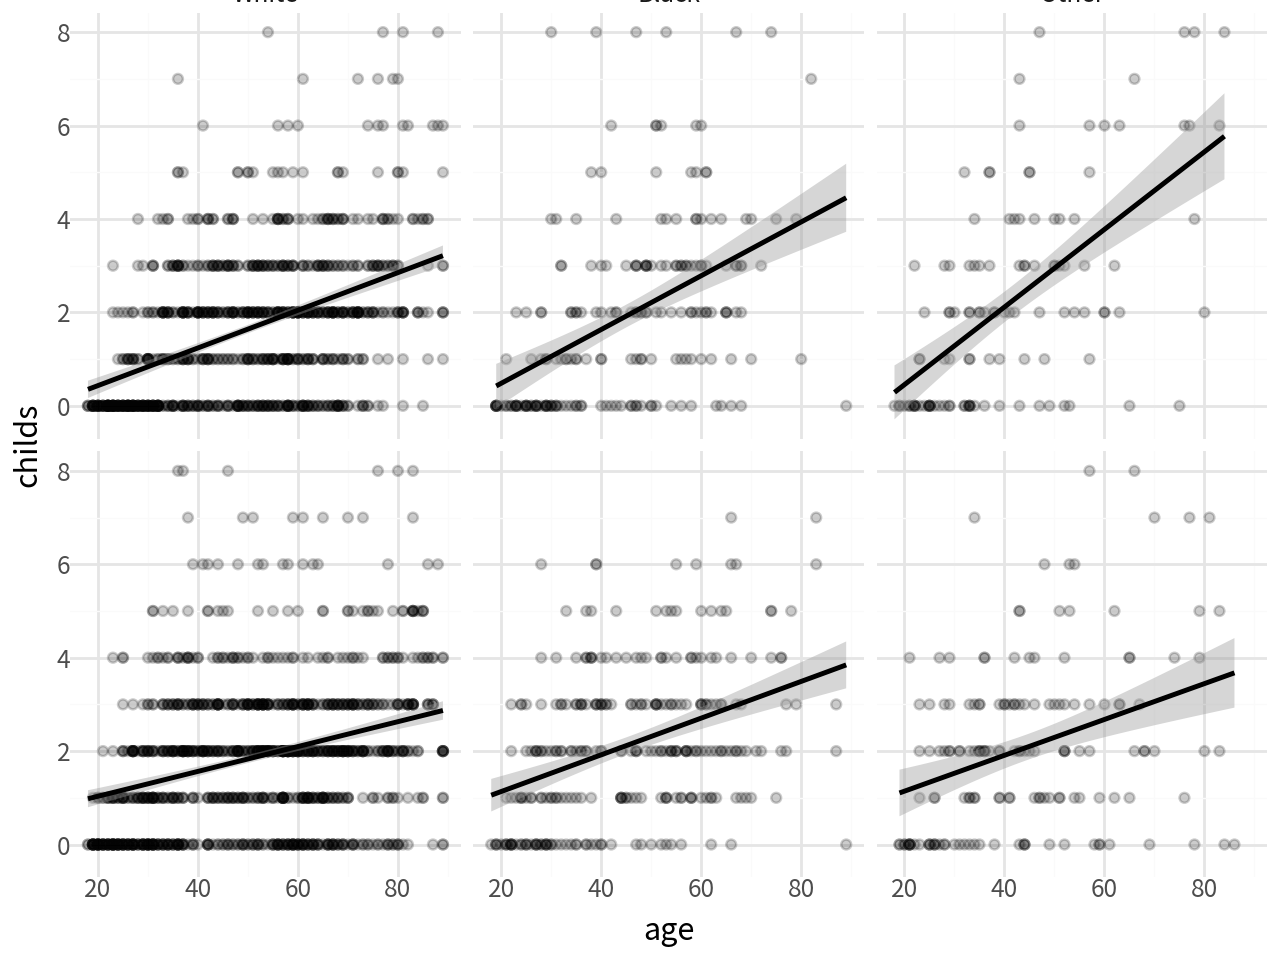

In [7]:
p = ggplot(gss_sm, aes(x='age', y='childs'))
p + geom_point(alpha=0.2) + geom_smooth(
) + facet_grid('sex ~ race')

## 図 4.6

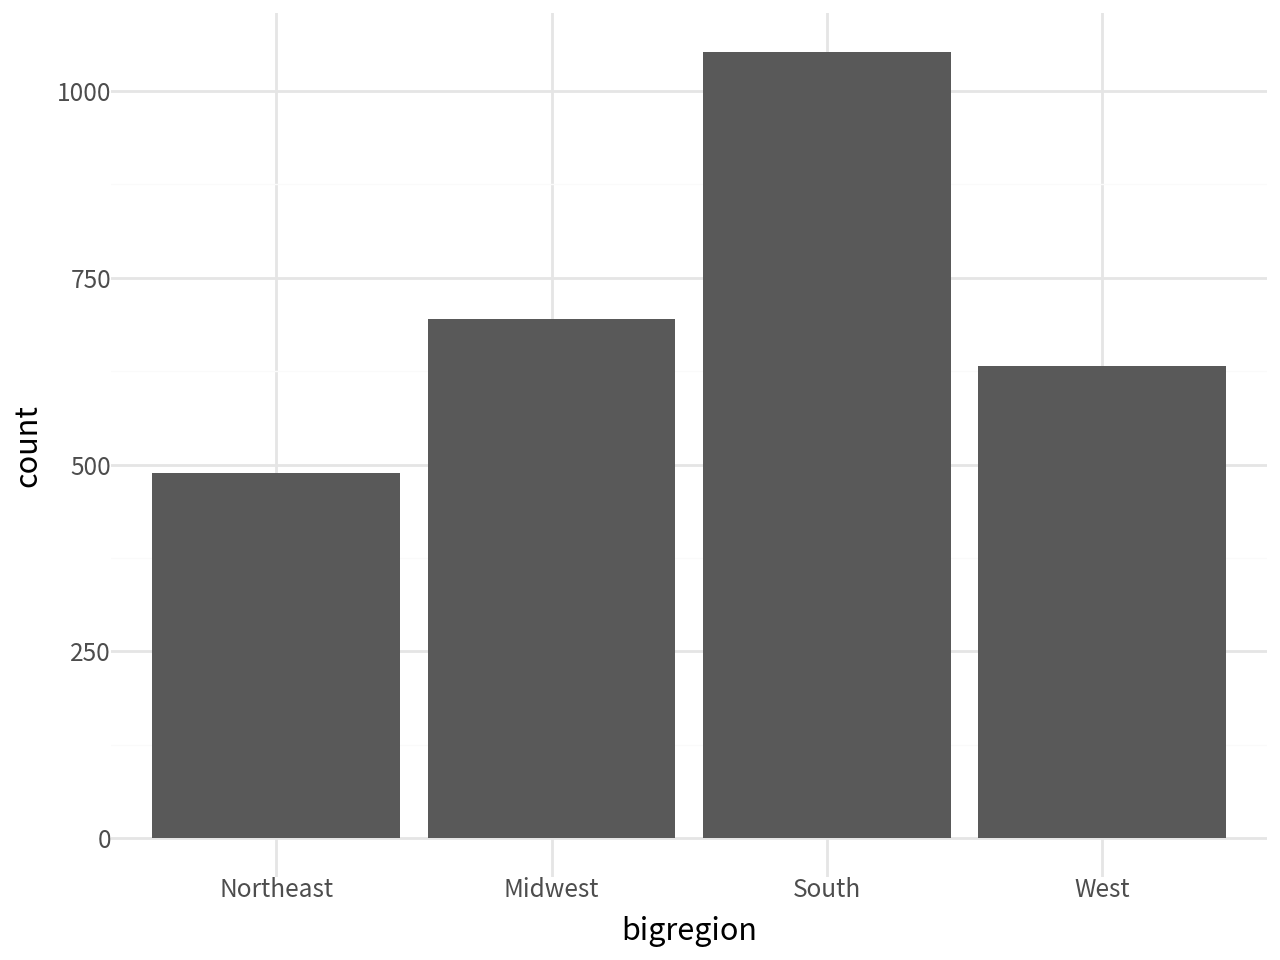

In [8]:
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar()

## 図 4.7

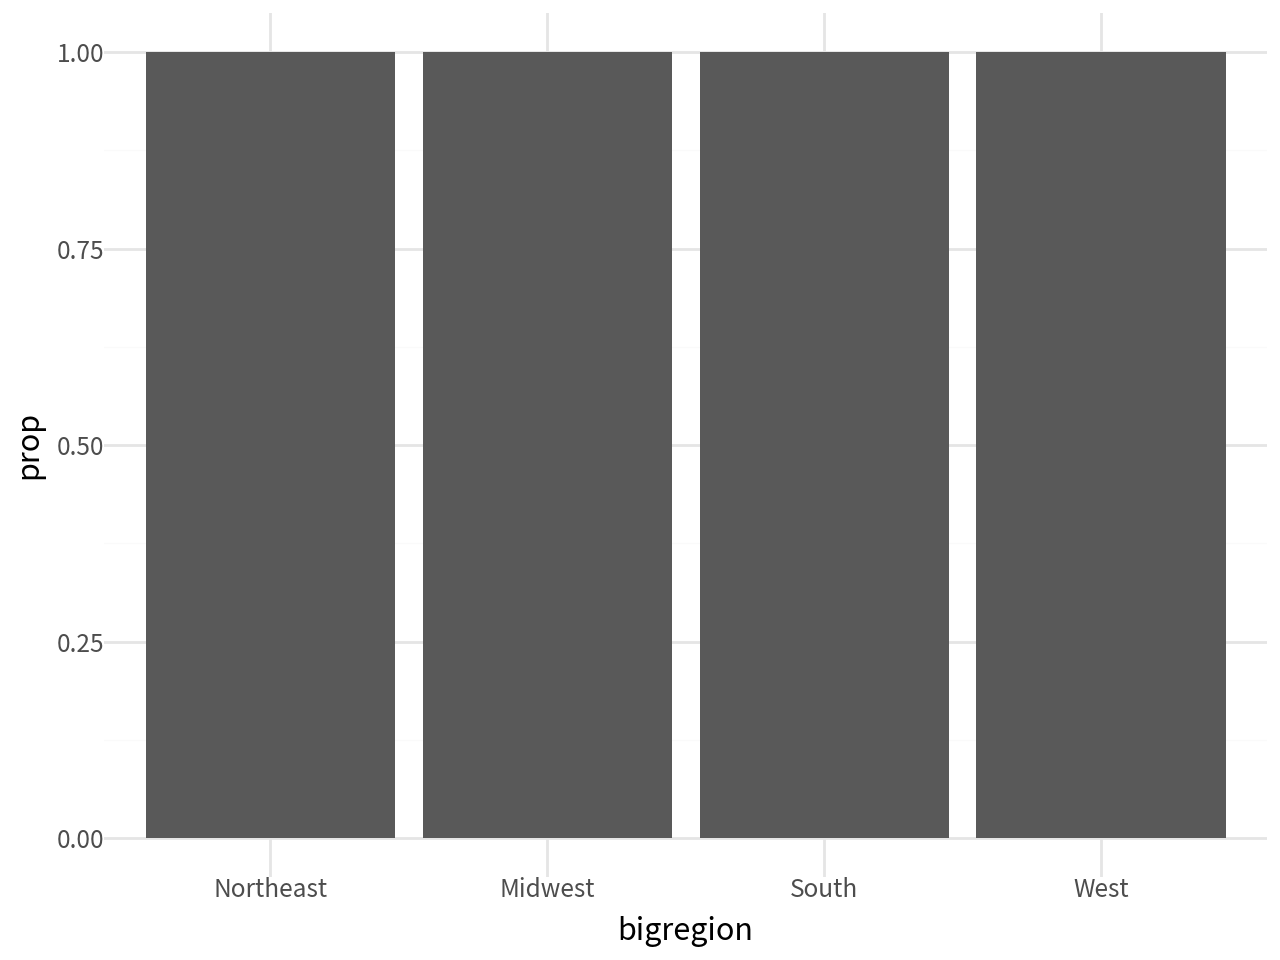

In [9]:
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar(aes(y ='..prop..'))

## 図 4.8

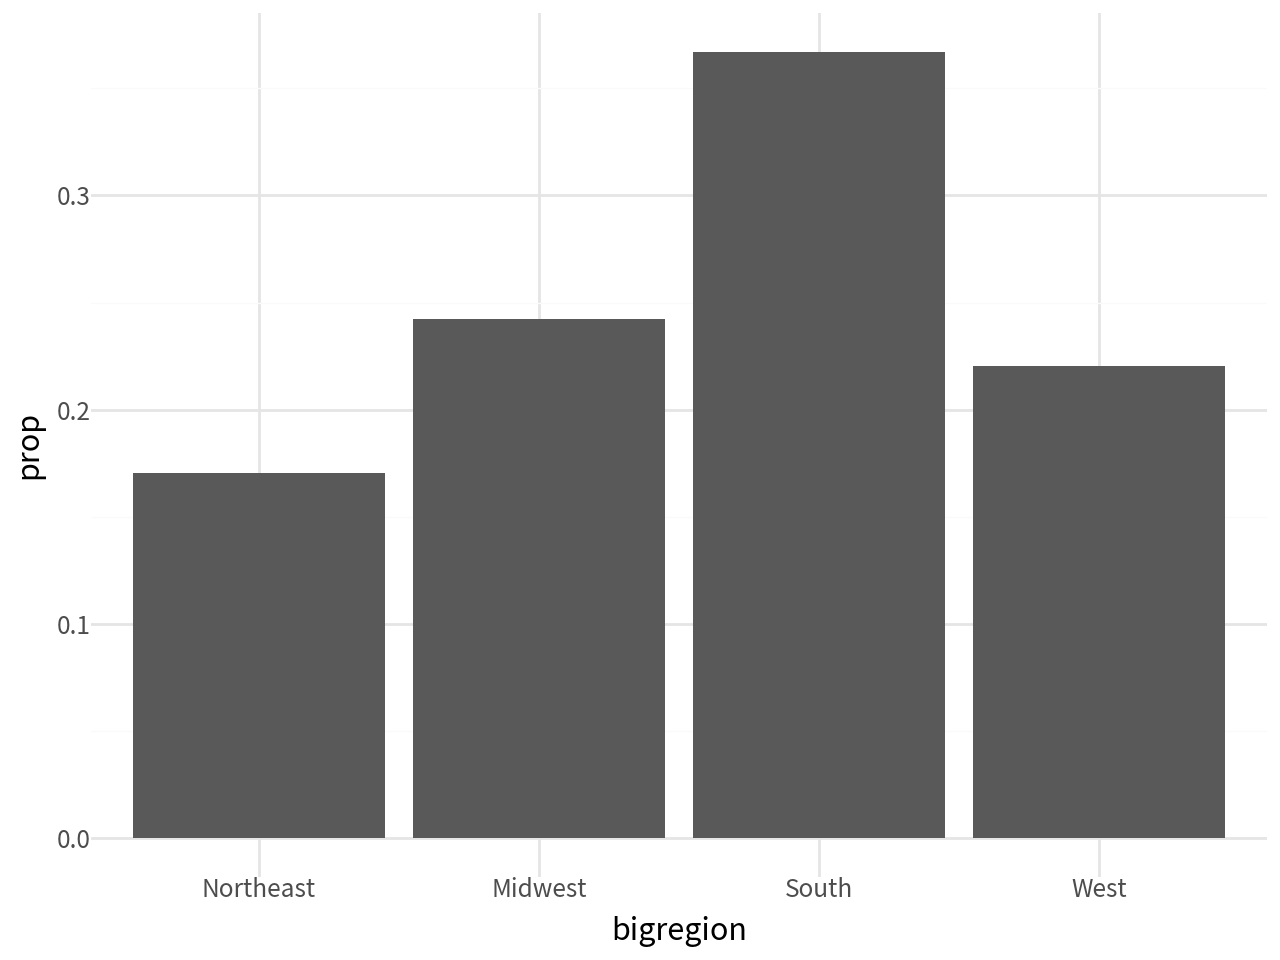

In [10]:
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar(aes(y='..prop..', group=1))

## 図 4.9

注 1: **Plotnine** は現時点 (v0.8) では欠損値のあるカテゴリ変数列を適切に扱うことができません. NaN 値をレベルの1つに加えたカテゴリ変数を再定義する必要があります. **Pysocviz** は `redefine_cat_with_na()` という便利関数で簡単にこの変更ができます.

注 2: **ggplot2** は NA 値に自動的に地味な色 (暗灰色) を割り当てますが, **plotnine** はそうしません. 現時点では (v0.8) **ggplot2** の出力を真似るには手動でカラーマッピングを変える必要があります. この例では `mizani.palettes.brewer_pal` 関数を使用しています. 

注 3: `scale_color_brewer`/`scale_fill_brewer` の `type='qualitative'` 引数は `type='qual'` に短縮表記できます. 

In [11]:
gss_sm = load_dataset('gss_sm')
gss_sm = gss_sm.assign(religion=lambda d: redefine_cat_with_na(d['religion']))

In [12]:
religion_colors = brewer_pal(type='qual', palette='Set1')(gss_sm['religion'].unique().shape[0])
religion_colors = dict(zip(gss_sm['religion'].unique(), religion_colors))
religion_colors['NA'] = '#595959'

In [13]:
p = ggplot(gss_sm, aes(x='religion', color='religion'))
(p + geom_bar() + scale_color_manual(religion_colors)).draw();

p = ggplot(gss_sm, aes(x='religion', fill='religion'))
(p + geom_bar() + guides(fill=False) + scale_fill_manual(religion_colors)).draw();

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 5 values. 6 were requested from it.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_color_manual can return a maximum of 5 values. 6 were requested from it.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.


## 図 4.10

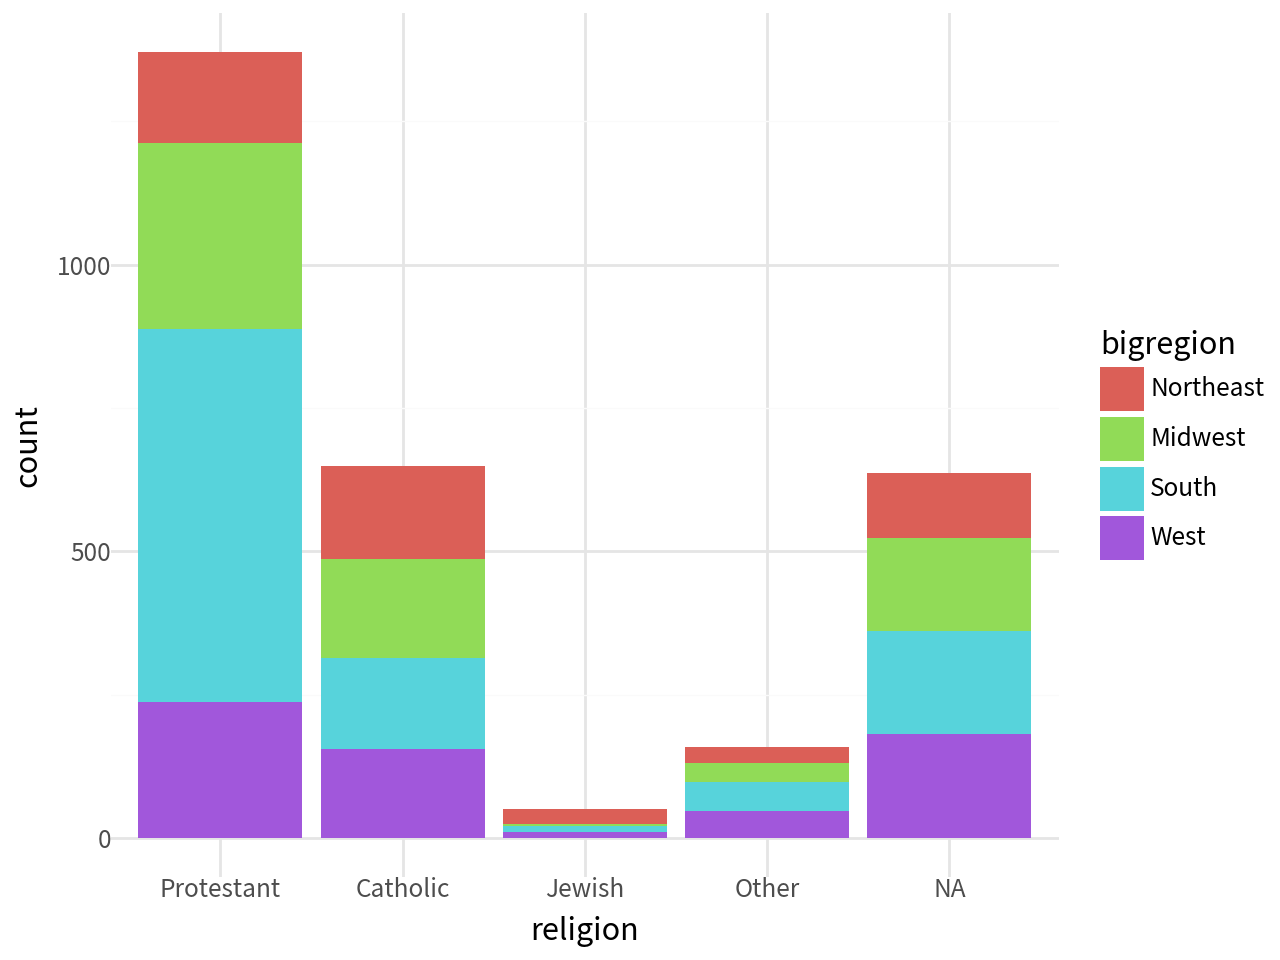

In [14]:
p = ggplot(gss_sm, aes(x='religion', fill='bigregion'))
p + geom_bar()

## 図 4.11

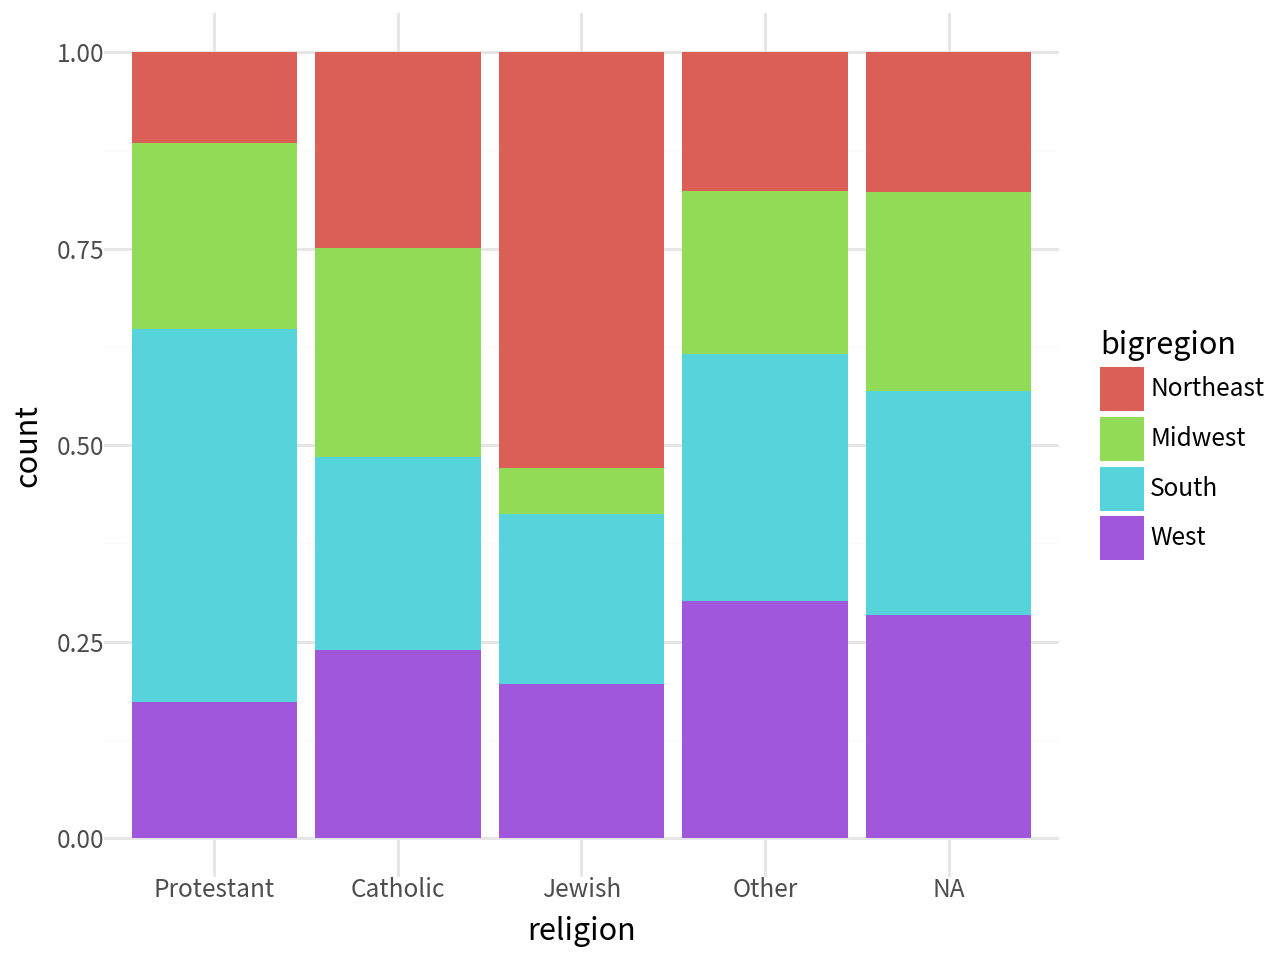

In [15]:
p = ggplot(gss_sm, aes(x='religion', fill='bigregion'))
p + geom_bar(position="fill")

## 図 4.12

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.


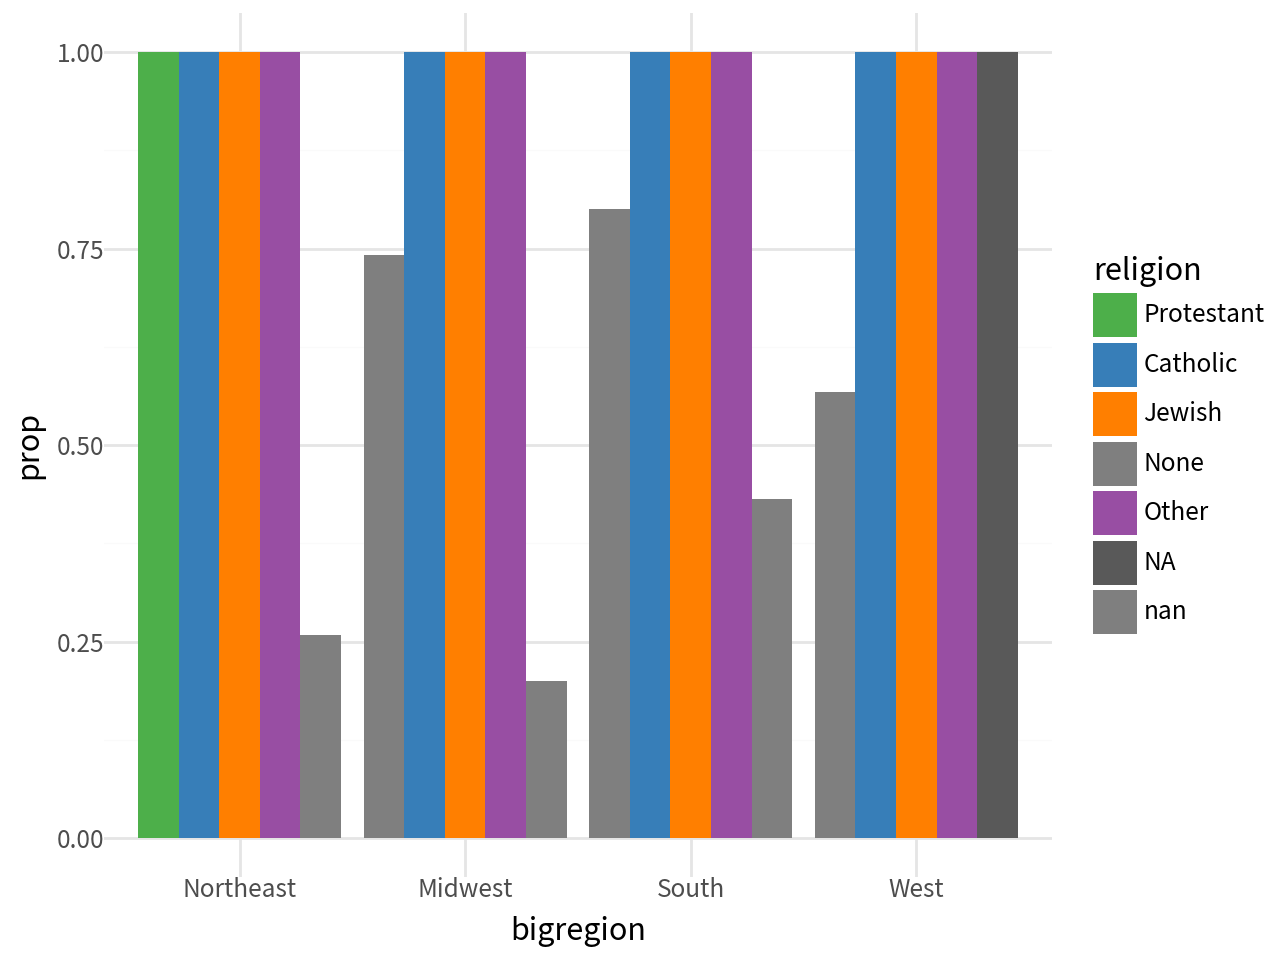

In [16]:
p = ggplot(gss_sm, aes(x='bigregion', fill='religion'))
p = ggplot(gss_sm, aes(x='bigregion', fill='religion'))
p + geom_bar(aes(y='..prop..'), position='dodge'
) + scale_fill_manual(religion_colors)

## 図 4.13

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/scales/scale_manual.py:44: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.


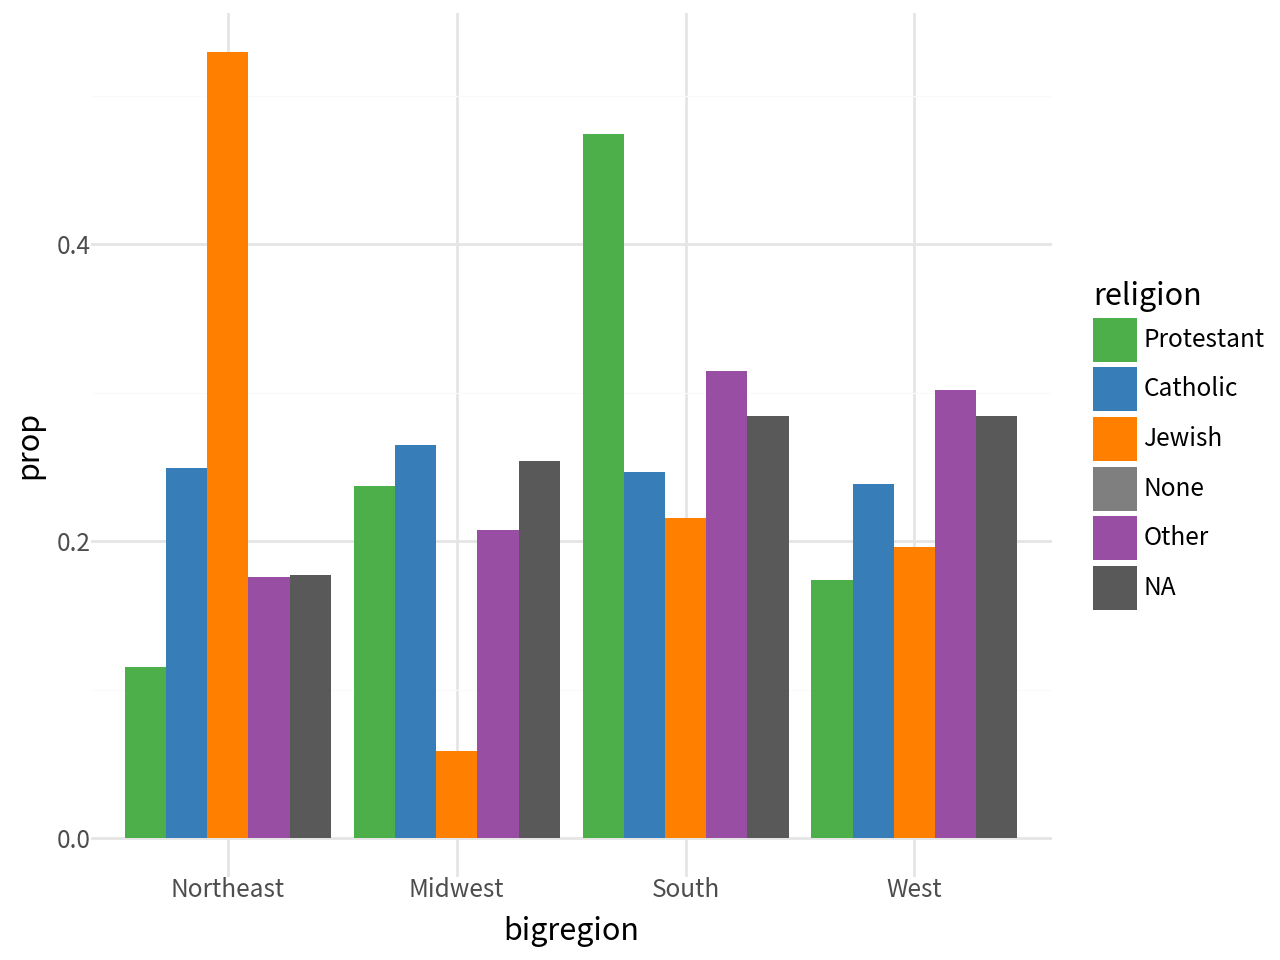

In [17]:
p = ggplot(gss_sm, aes(x='bigregion', fill='religion'))
p + geom_bar(aes(y='..prop..', group='religion'), position='dodge'
) + scale_fill_manual(religion_colors)

## 図 4.14

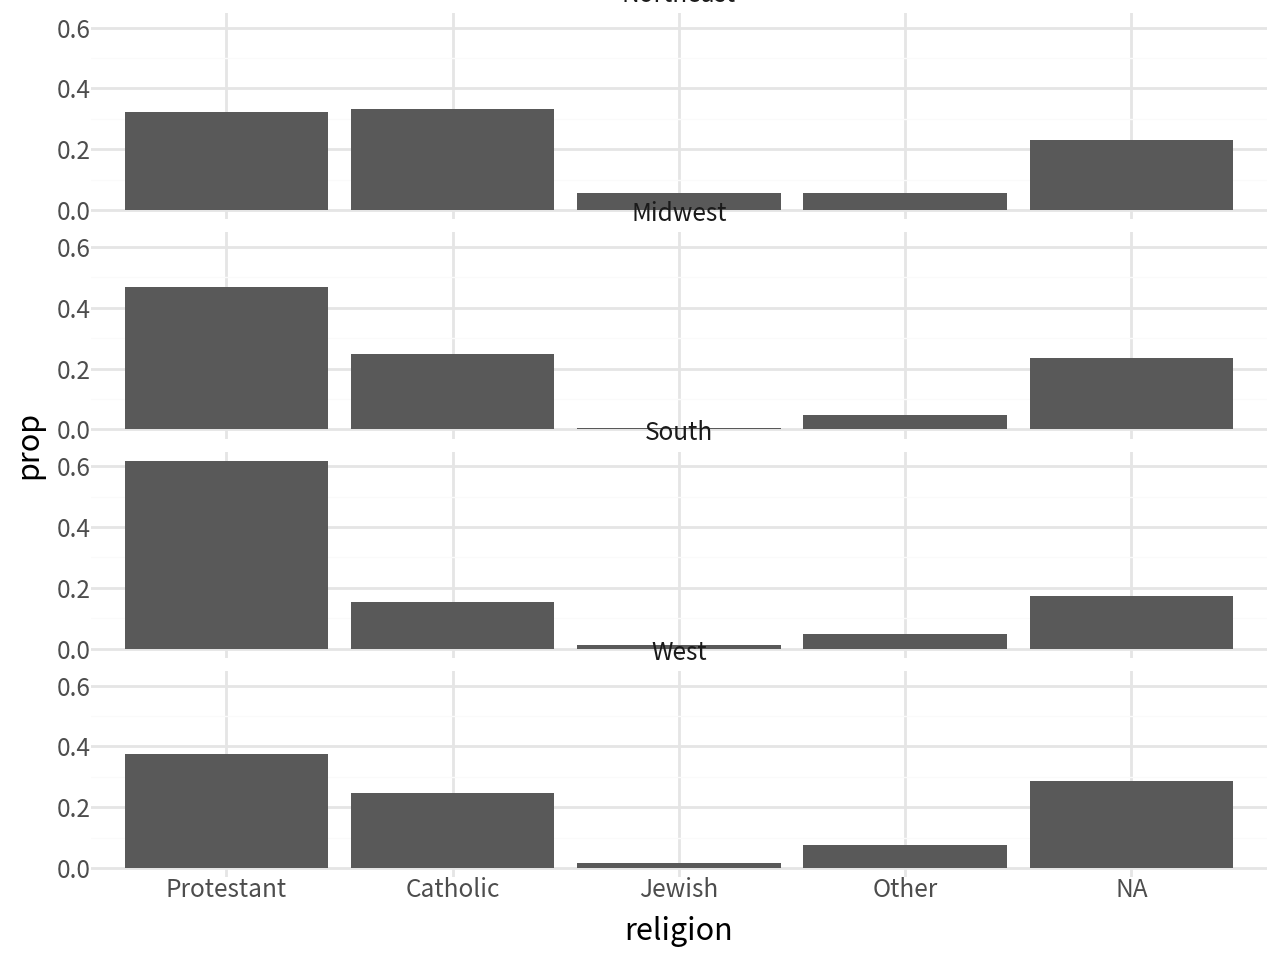

In [18]:
p = ggplot(gss_sm, aes(x='religion'))
p + geom_bar(
  aes(y='..prop..', group='bigregion'), position="dodge"
) + facet_wrap('bigregion', ncol=1)

## 図 4.15

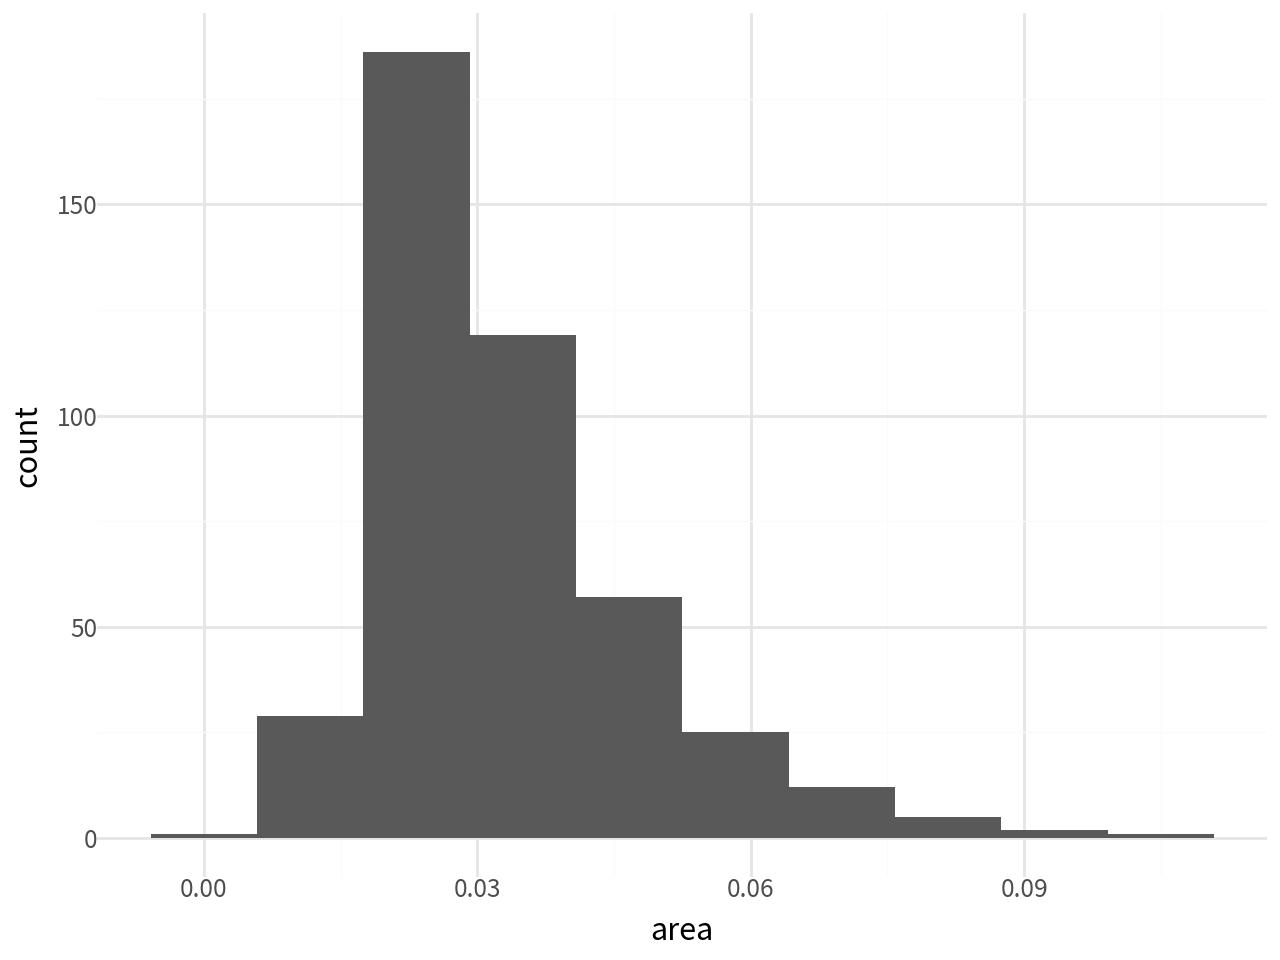

In [19]:
p = ggplot(midwest, aes(x='area'))
p + geom_histogram()
p = ggplot(midwest, aes(x='area'))
p + geom_histogram(bins = 10)

## 図 4.16

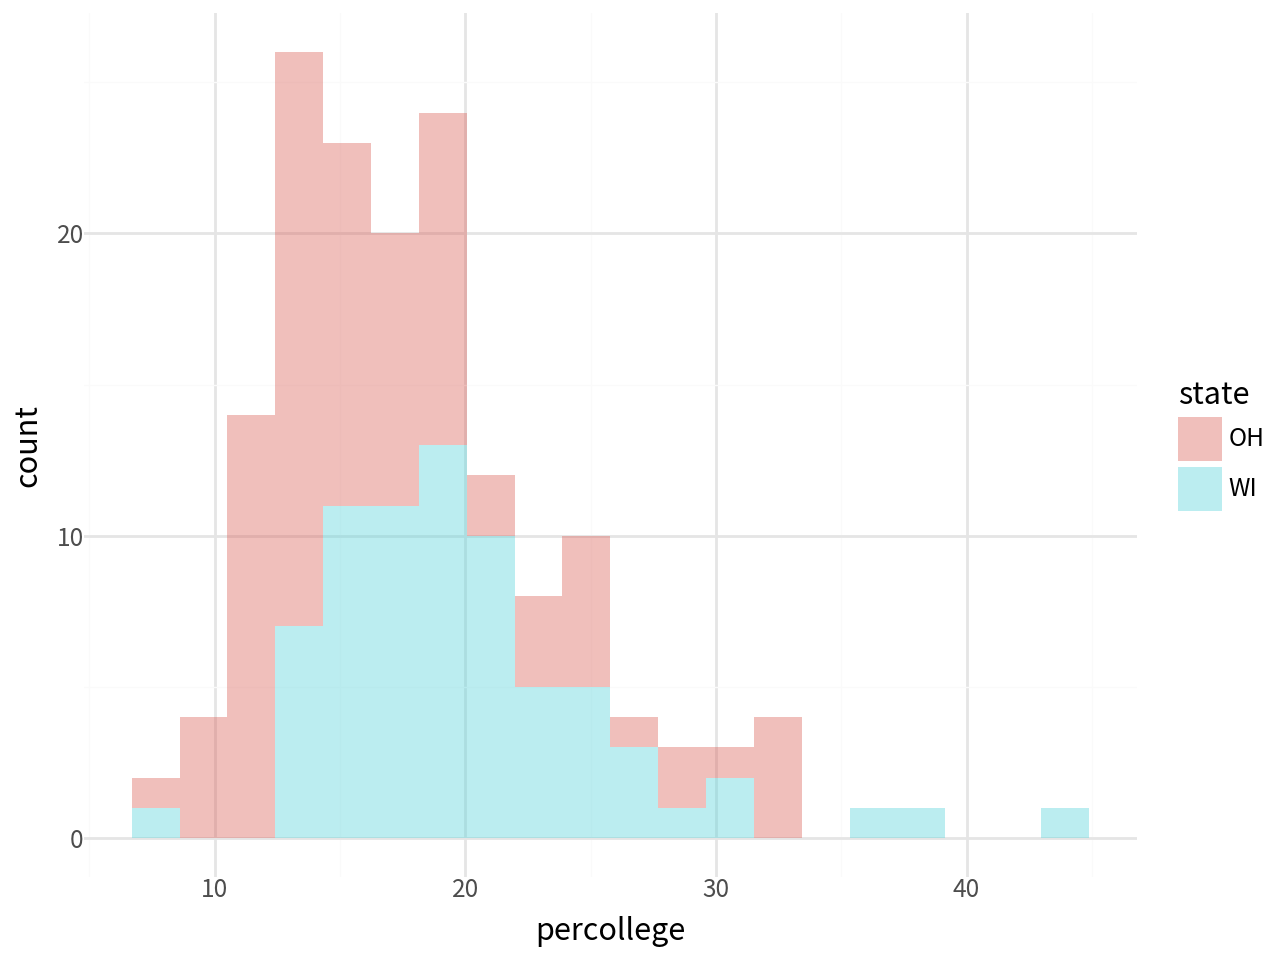

In [20]:
oh_wi = ["OH", "WI"]
p = ggplot(
  midwest.loc[lambda d: d['state'].isin(oh_wi)],
  aes(x='percollege', fill='state'))
p + geom_histogram(alpha=0.4, bins=20)

## 図 4.17

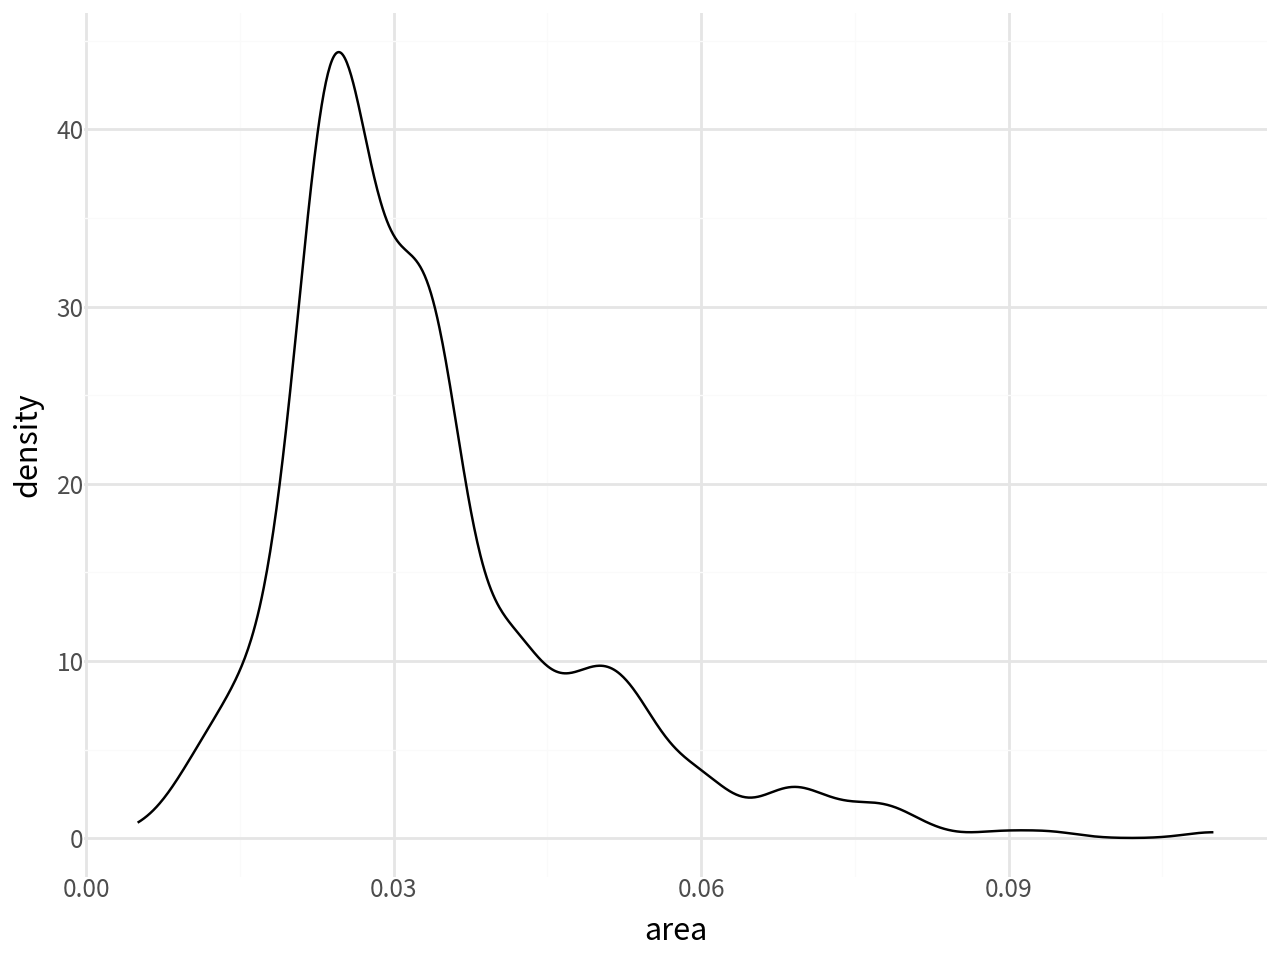

In [21]:
p = ggplot(midwest, aes(x='area'))
p + geom_density()

## 図 4.18

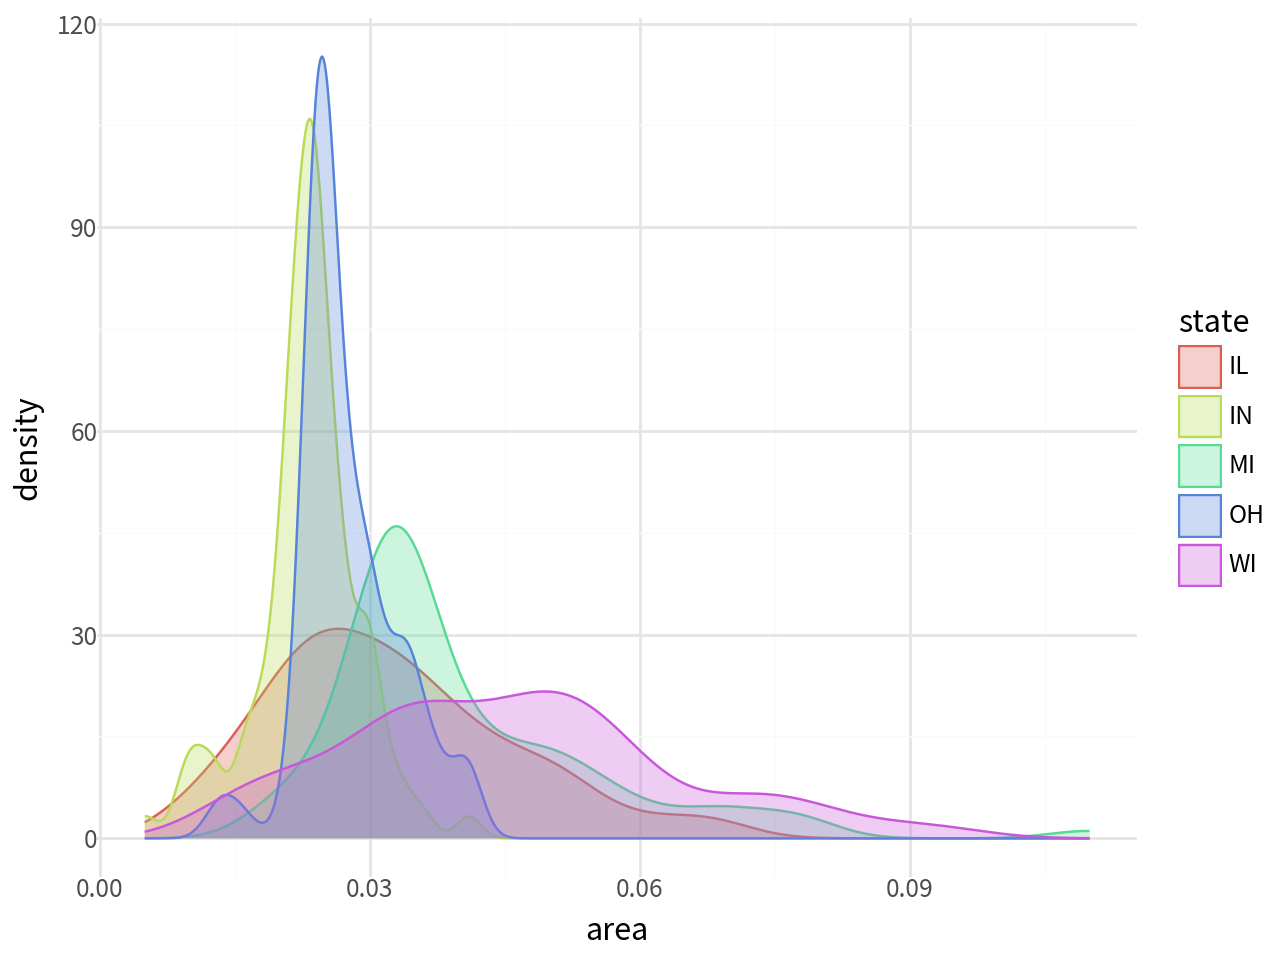

In [22]:
p = ggplot(midwest,
           aes(x='area', fill='state', color='state'))
p + geom_density(alpha=0.3)

## 図 4.19

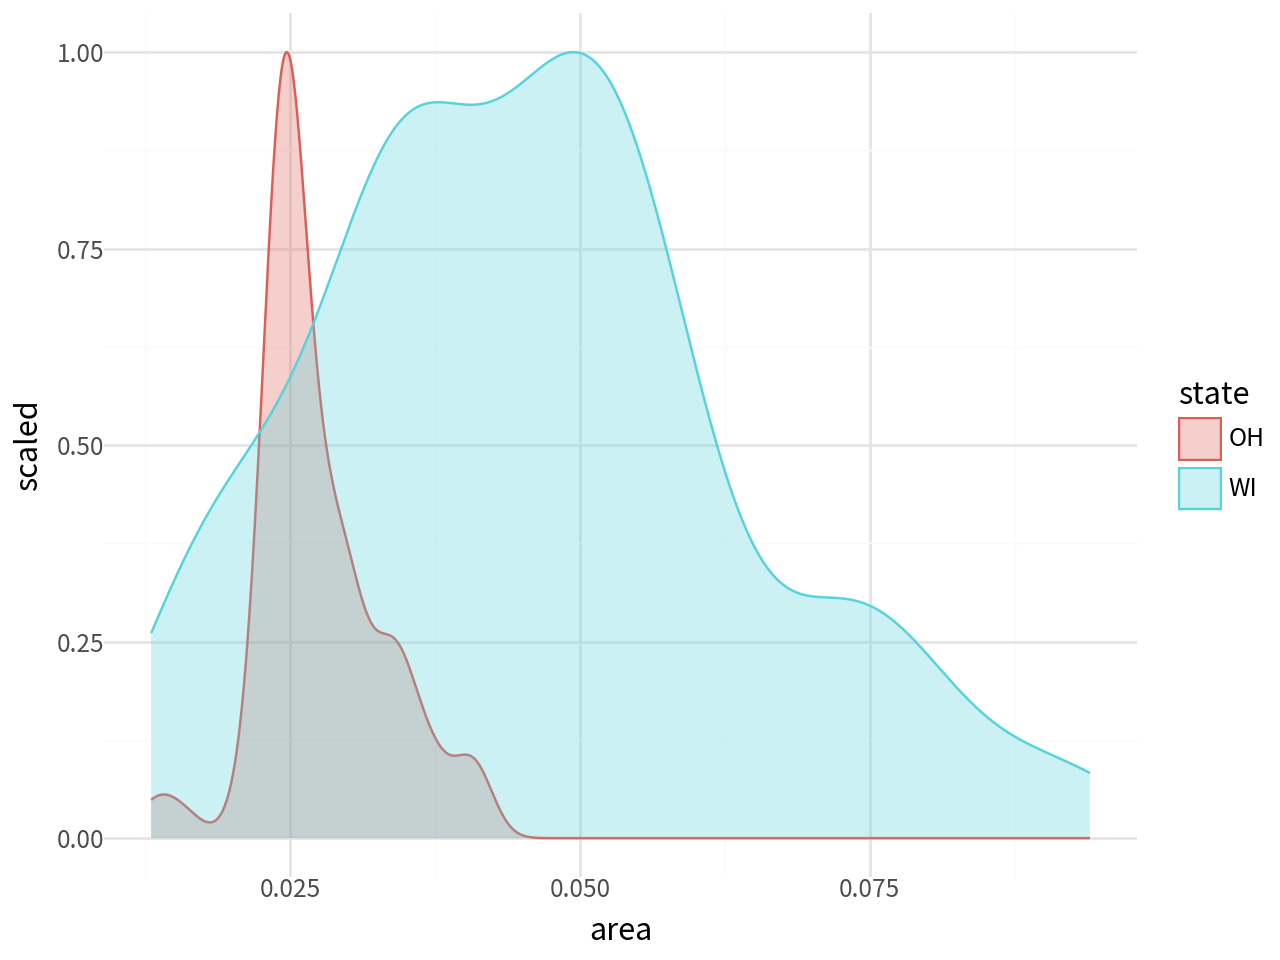

In [23]:
p = ggplot(midwest.loc[lambda d: d['state'].isin(oh_wi)],
           aes(x='area', fill='state', color='state'))
p + geom_density(aes(y='..scaled..'), alpha=0.3)

## 図 4.20

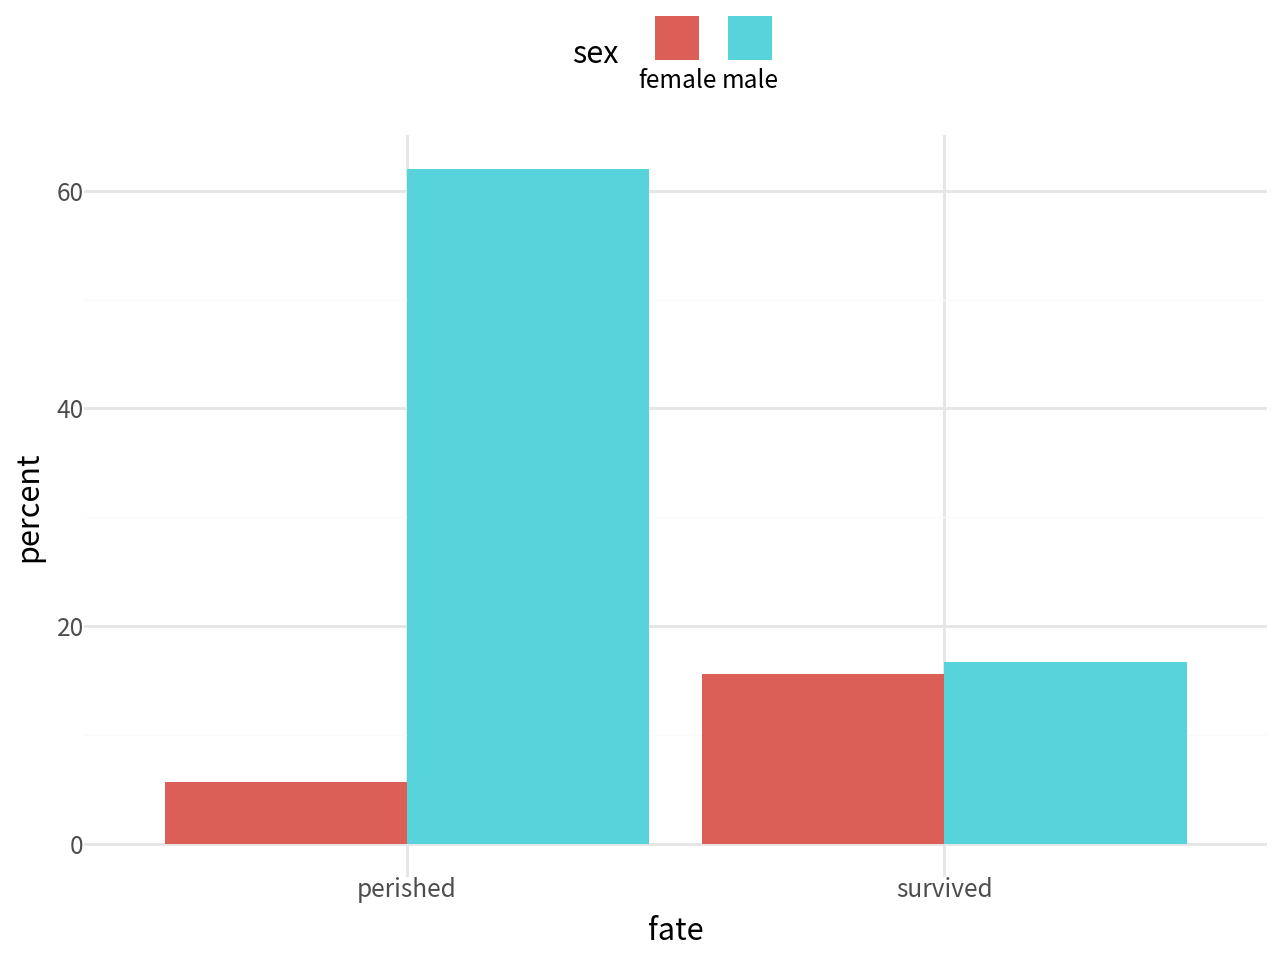

In [24]:
p = ggplot(
    titanic,
    aes(x='fate', y='percent', fill='sex')
)
p + geom_bar(position='dodge', stat='identity') + theme(legend_position="top")

## 図 4.21

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


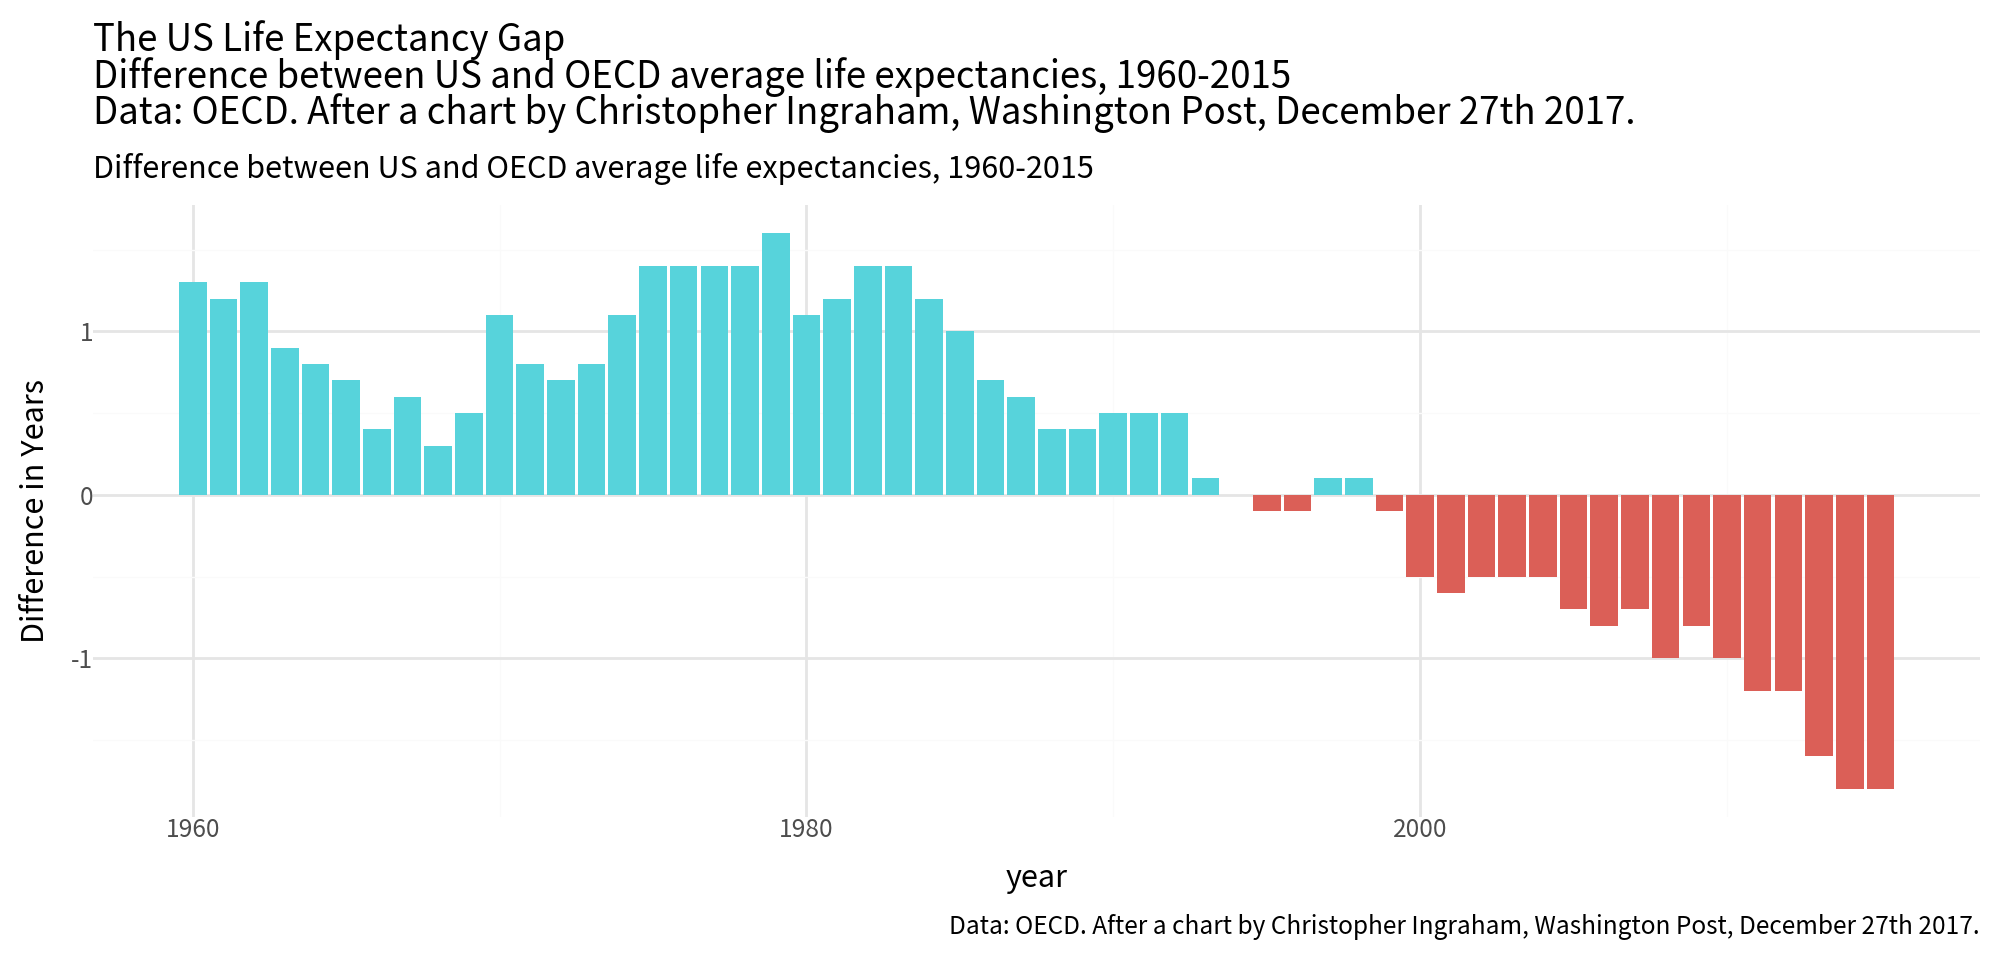

In [25]:
p = ggplot(oecd_sum, aes(x='year', y='diff', fill='hi_lo'))
p + geom_col(
) + guides(fill=False) + labs(
    x=None,
    y="Difference in Years",
    title='\n'.join([
      "The US Life Expectancy Gap",
      "Difference between US and OECD average life expectancies, \
1960-2015",
      "Data: OECD. After a chart by Christopher Ingraham, Washington \
Post, December 27th 2017."
    ]),
    subtitle="Difference between US and OECD average life expectancies, \
1960-2015",
    caption = "Data: OECD. After a chart by Christopher Ingraham, Washington \
Post, December 27th 2017.") + theme(
    figure_size=(10, 4.8)
)